In [29]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from config import j, latent_shape
latent_dim = latent_shape()

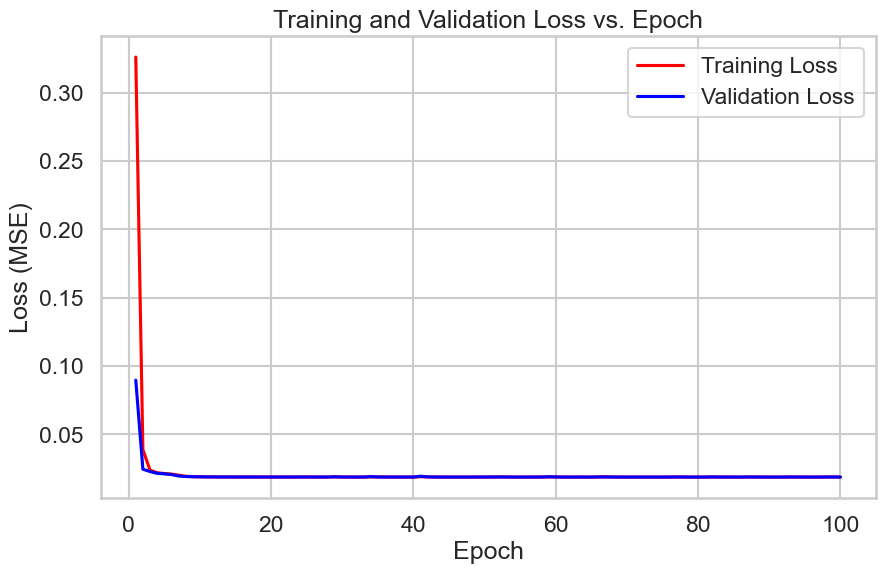

In [30]:
training_data = pd.read_csv(j(f'results/{latent_dim}/training_history.csv'))

sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n

sns.lineplot(data=training_data, x='epoch', y=f'loss', label=f'Training Loss', color='red')

sns.lineplot(data=training_data, x='epoch', y=f'val_loss', label=f'Validation Loss', color='blue')

plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
# Show the plot
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.savefig(j(f'results/{latent_dim}/training_log.pdf'))
plt.show()

In [16]:
path = j(f'results/{latent_dim}/performance_v100.csv')
df = pd.read_csv(path)
highlight_range0 = df['timestep'][0]
highlight_range = df['timestep'][int(len(df['timestep']) * 0.8)]
df

,timestep,latent-rmse_1,rmse_1,latent-mae_1,mae_1,time_1,latent-rmse_2,rmse_2,latent-mae_2,mae_2,...,latent-rmse_8,rmse_8,latent-mae_8,mae_8,time_8,latent-rmse_9,rmse_9,latent-mae_9,mae_9,time_9
0,5695000,0.000374,0.137093,0.000404,0.106517,5.408986,0.000643,0.137118,0.000616,0.106535,...,0.000403,0.137136,0.000407,0.106540,7.625994,0.000559,0.136954,0.000540,0.106376,8.058930
1,5700000,0.000424,0.137118,0.000417,0.106535,5.274937,0.000596,0.137067,0.000564,0.106502,...,0.000346,0.136954,0.000362,0.106375,7.137878,0.000759,0.137000,0.000726,0.106465,7.318912
2,5705000,0.000335,0.137069,0.000348,0.106502,5.303082,0.000364,0.137137,0.000367,0.106527,...,0.000473,0.137000,0.000446,0.106465,7.164262,0.000307,0.136969,0.000316,0.106417,7.223622
3,5710000,0.000528,0.137138,0.000490,0.106527,5.223708,0.000327,0.137149,0.000326,0.106568,...,0.000282,0.136970,0.000284,0.106417,6.843862,0.000384,0.137019,0.000351,0.106462,7.129308
4,5715000,0.000329,0.137147,0.000342,0.106568,5.025599,0.000265,0.137122,0.000298,0.106516,...,0.000324,0.137019,0.000366,0.106463,6.927225,0.000320,0.136978,0.000341,0.106396,7.512170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,10280000,0.000406,0.137219,0.000396,0.106606,5.576163,0.000360,0.137072,0.000388,0.106468,...,0.000778,0.136958,0.000731,0.106397,6.962842,0.000277,0.137184,0.000341,0.106574,7.206381
918,10285000,0.000349,0.137073,0.000382,0.106468,5.158450,0.000460,0.136969,0.000431,0.106384,...,0.000369,0.137184,0.000361,0.106573,7.112566,0.000344,0.137215,0.000327,0.106563,7.455137
919,10290000,0.000578,0.136969,0.000539,0.106385,5.235122,0.000547,0.137095,0.000545,0.106530,...,0.000255,0.137215,0.000296,0.106563,7.203026,0.000497,0.137064,0.000496,0.106496,7.223209
920,10295000,0.000269,0.137096,0.000304,0.106529,5.549110,0.001116,0.137189,0.001059,0.106519,...,0.000295,0.137065,0.000315,0.106495,7.327705,0.000341,0.137299,0.000342,0.106668,7.324375


In [17]:
ls = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'indigo', 'purple', 'violet']

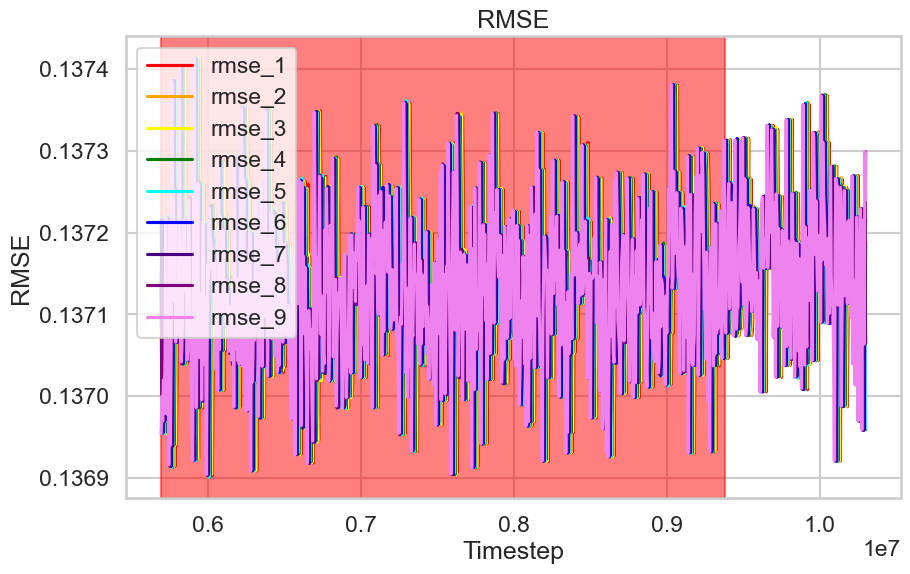

In [18]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'rmse_{i + 1}', label=f'rmse_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)

plt.ylabel('RMSE')
plt.xlabel('Timestep')
# Show the plot
plt.legend()
plt.title('RMSE')
plt.savefig(j(f'results/{latent_dim}/RMSE.pdf'))
plt.show()

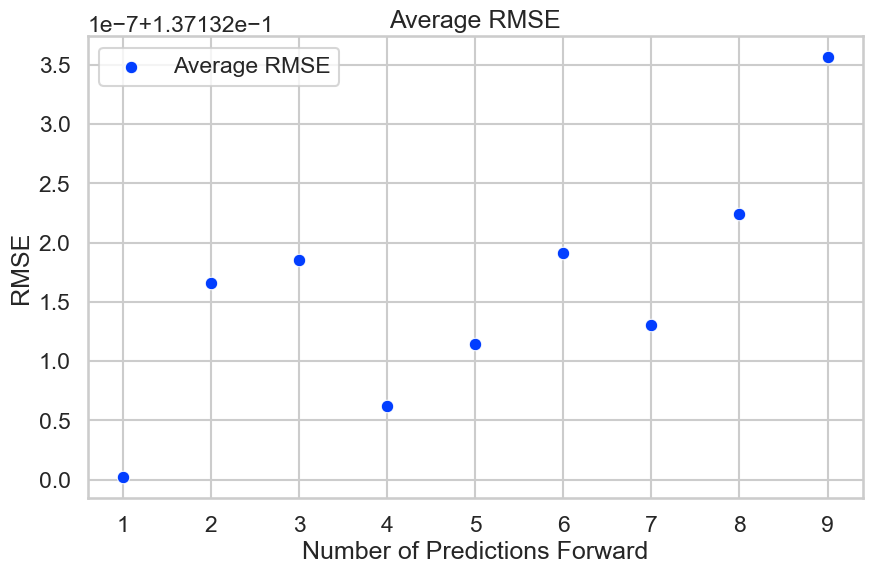

In [19]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('rmse_')])

sns.scatterplot(x=x, y=y, label='Average RMSE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('RMSE')

plt.title('Average RMSE')
plt.savefig(j(f'results/{latent_dim}/average_RMSE.pdf'))
plt.show()

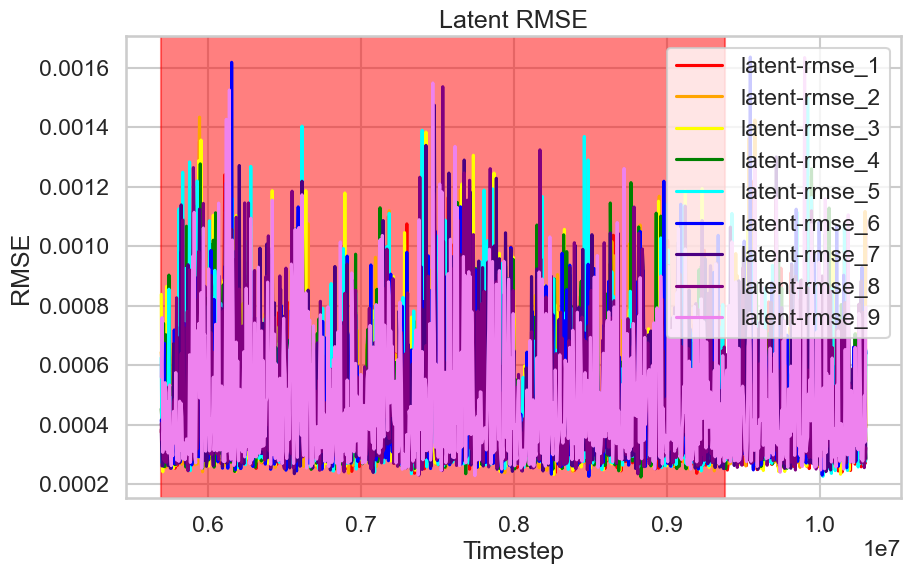

In [20]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'latent-rmse_{i + 1}', label=f'latent-rmse_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)
plt.ylabel('RMSE')
plt.xlabel('Timestep')
# Show the plot
plt.legend()
plt.title('Latent RMSE')
plt.savefig(j(f'results/{latent_dim}/latent_RMSE.pdf'))
plt.show()

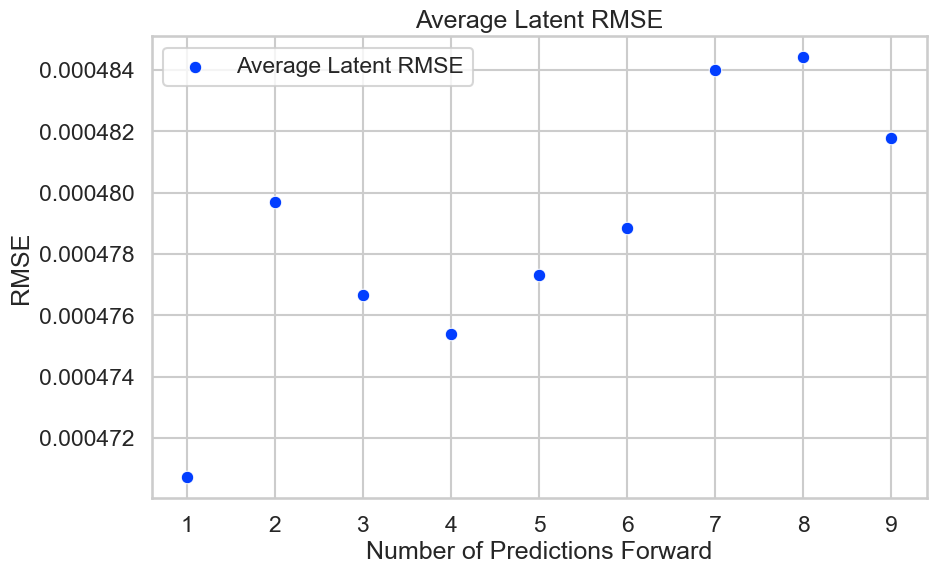

In [21]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('latent-rmse_')])

sns.scatterplot(x=x, y=y, label='Average Latent RMSE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('RMSE')

plt.legend()

plt.title('Average Latent RMSE')
plt.savefig(j(f'results/{latent_dim}/average_latent_RMSE.pdf'))
plt.show()

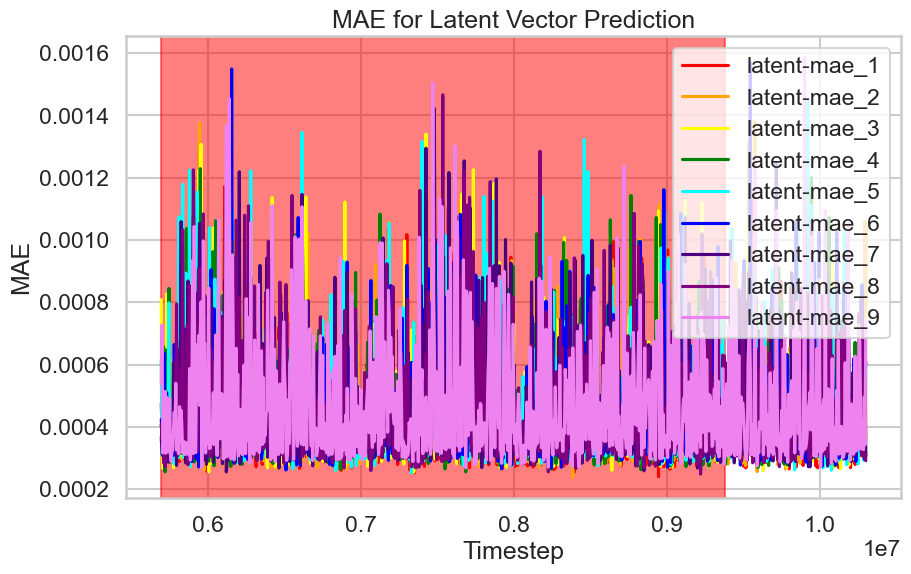

In [22]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'latent-mae_{i + 1}', label=f'latent-mae_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)

plt.ylabel('MAE')
plt.xlabel('Timestep')
# Show the plot
plt.title('MAE for Latent Vector Prediction')
plt.legend()
plt.savefig(j(f'results/{latent_dim}/latent_MAE.pdf'))
plt.show()

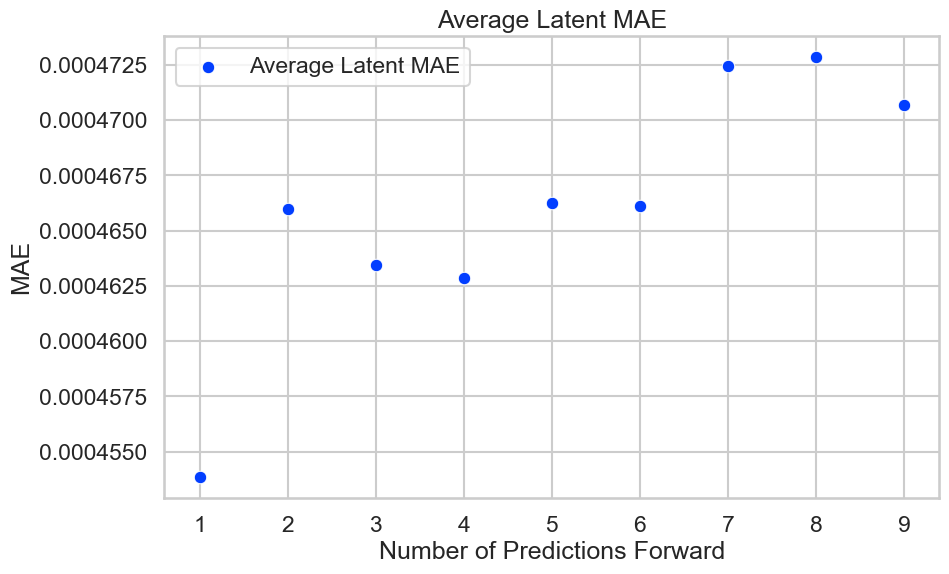

In [23]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('latent-mae_')])

sns.scatterplot(x=x, y=y, label='Average Latent MAE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('MAE')

plt.title('Average Latent MAE')
plt.legend()
plt.savefig(j(f'results/{latent_dim}/average_latent_MAE.pdf'))
plt.show()

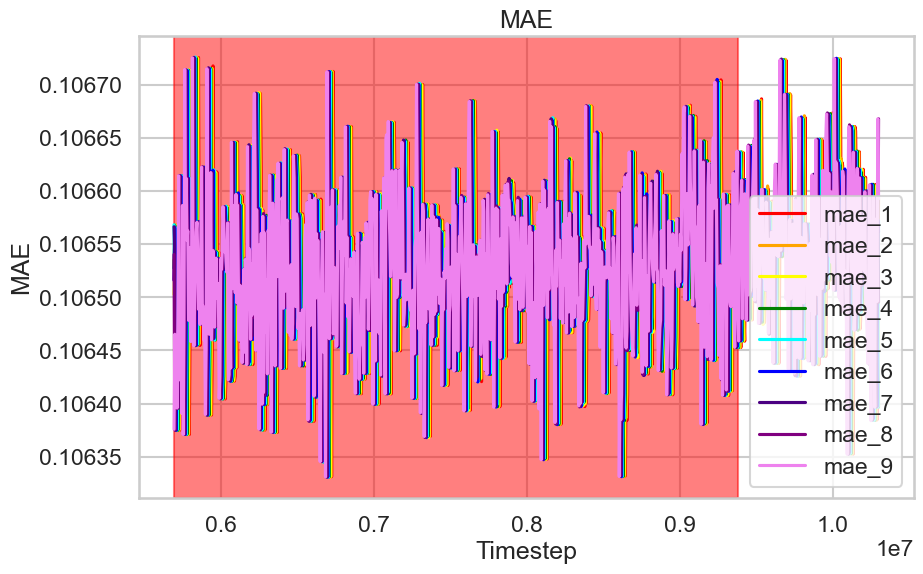

In [24]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'mae_{i + 1}', label=f'mae_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)



plt.ylabel('MAE')
plt.xlabel('Timestep')
# Show the plot
plt.legend()
plt.title('MAE')

plt.savefig(j(f'results/{latent_dim}/MAE.pdf'))
plt.show()

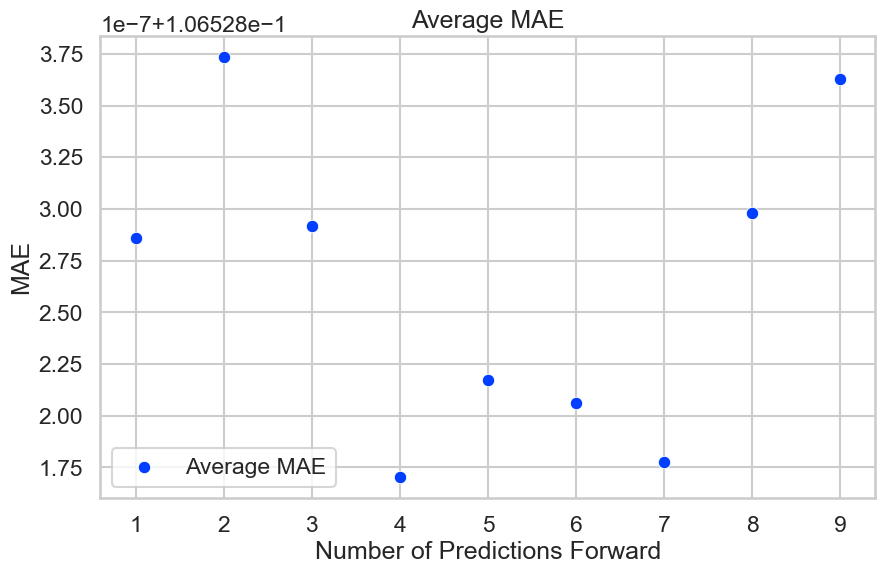

In [25]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('mae_')])

sns.scatterplot(x=x, y=y, label='Average MAE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('MAE')

plt.legend()
plt.title('Average MAE')
plt.savefig(j(f'results/{latent_dim}/average_MAE.pdf'))
plt.show()

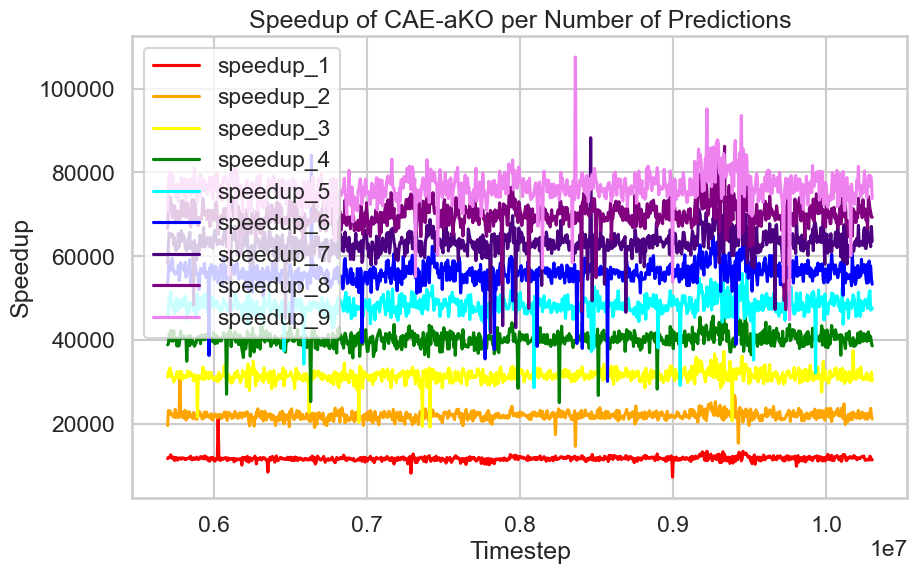

In [26]:
prev_steps_per_ms = 0.0787037037037
prev_time_5000 = 5000 / prev_steps_per_ms


sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))


# Plot each rmse_n
for i in range(len(ls)):
    df[f'time_{i + 1}'] = prev_time_5000 * (i + 1) / df[f'time_{i + 1}']
    sns.lineplot(data=df, x='timestep', y=f'time_{i + 1}', label=f'speedup_{i + 1}', color=ls[i])

plt.ylabel('Speedup')
plt.xlabel('Timestep')
# Show the plot
plt.title('Speedup of CAE-aKO per Number of Predictions')

plt.savefig(j(f'results/{latent_dim}/speedup.pdf'))
plt.show()

df = pd.read_csv(path)

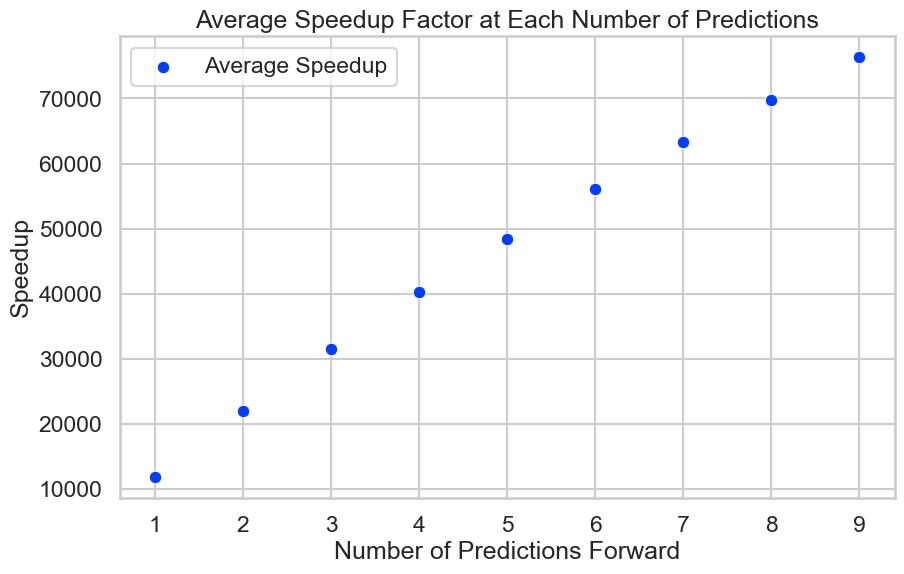

In [28]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([prev_time_5000 * i / np.median(np.array(df[f'time_{i}'])) for i in x])

sns.scatterplot(x=x, y=y, label='Average Speedup')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Speedup')

plt.legend()
plt.title('Average Speedup Factor at Each Number of Predictions')

plt.savefig(j(f'results/{latent_dim}/average_speedup.pdf'))
plt.show()

In [57]:
K = np.load(j(f'results/{latent_dim}/koopman.npy'))

initial_condition = np.load(j(f'latent/{latent_dim}/5695000.npy'))[0]
dt = 250e-6
eigenvalues, eigenvectors = np.linalg.eig(K)

frequencies = eigenvalues / dt

eigenvalues.sort()
print(eigenvalues[:11])

[-4.7665316e-09+0.0000000e+00j -4.4101953e-09+0.0000000e+00j
 -3.9435069e-09-2.4985050e-09j -3.9435069e-09+2.4985050e-09j
 -3.7418433e-09-1.0386930e-09j -3.7418433e-09+1.0386930e-09j
 -3.4974017e-09+0.0000000e+00j -3.4877563e-09-3.3730946e-10j
 -3.4877563e-09+3.3730946e-10j -3.3237662e-09-1.6190396e-09j
 -3.3237662e-09+1.6190396e-09j]


In [59]:
eigenvectors[0][:10]

array([ 0.06059847+0.j        , -0.05063836+0.j        ,
       -0.08507883-0.00404755j, -0.08507883+0.00404755j,
        0.04929186+0.02516446j,  0.04929186-0.02516446j,
       -0.11380769+0.j        , -0.0521288 -0.01495792j,
       -0.0521288 +0.01495792j, -0.02452007+0.j        ], dtype=complex64)

In [49]:

num_snapshots = int(932 * 0.8)
time_indices = np.arange(num_snapshots) * dt
dynamic_modes = np.zeros((eigenvectors.shape[0], num_snapshots), dtype=np.complex64)
for i in range(num_snapshots):
    dynamic_modes[:, i] = (eigenvectors * np.exp(frequencies * time_indices[i])) @ initial_condition.T

/var/folders/9h/4ng9_gkj7ws9r0snlktn30k40000gp/T/ipykernel_32409/3863068426.py:5: RuntimeWarning: overflow encountered in exp
  dynamic_modes[:, i] = (eigenvectors * np.exp(frequencies * time_indices[i])) @ initial_condition.T
/var/folders/9h/4ng9_gkj7ws9r0snlktn30k40000gp/T/ipykernel_32409/3863068426.py:5: RuntimeWarning: invalid value encountered in multiply
  dynamic_modes[:, i] = (eigenvectors * np.exp(frequencies * time_indices[i])) @ initial_condition.T
/var/folders/9h/4ng9_gkj7ws9r0snlktn30k40000gp/T/ipykernel_32409/3863068426.py:5: RuntimeWarning: invalid value encountered in matmul
  dynamic_modes[:, i] = (eigenvectors * np.exp(frequencies * time_indices[i])) @ initial_condition.T


In [55]:
frequencies * time_indices[100]

array([ 9.99995422e+01+0.00000000e+00j, -4.76653128e-07+0.00000000e+00j,
       -3.94350678e-07+2.49850473e-07j, -3.94350678e-07-2.49850473e-07j,
        2.92096047e-07+3.40657181e-07j,  2.92096047e-07-3.40657181e-07j,
       -4.41019495e-07+0.00000000e+00j,  1.95990523e-07+3.84068244e-07j,
        1.95990523e-07-3.84068244e-07j,  4.15534231e-07+0.00000000e+00j,
       -1.53878361e-07+3.94465133e-07j, -1.53878361e-07-3.94465133e-07j,
       -1.94487484e-08+4.16840948e-07j, -1.94487484e-08-4.16840948e-07j,
       -3.74184310e-07+1.03869297e-07j, -3.74184310e-07-1.03869297e-07j,
       -2.11554266e-07+3.32641719e-07j, -2.11554266e-07-3.32641719e-07j,
       -7.40888666e-08+3.92654329e-07j, -7.40888666e-08-3.92654329e-07j,
       -1.22110052e-07+3.73225305e-07j, -1.22110052e-07-3.73225305e-07j,
        3.55271794e-07+1.95861091e-07j,  3.55271794e-07-1.95861091e-07j,
        3.97249551e-07+5.41875878e-08j,  3.97249551e-07-5.41875878e-08j,
        3.68748999e-07+1.32231477e-07j,  3.68748999